<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/TimeSeriesAnalysis_Forecating_AutoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIme Series Analysis - Forecasting with Auto ARIMA and ARIMA


    1. Load the data: The first step for model building is of course to load the dataset.

    2. Preprocessing: Depending on the dataset, the steps of preprocessing will be defined. 
      This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.  
    3. Make series stationary: In order to satisfy the assumption, it is necessary to make the series stationary. 
      This would include checking the stationarity of the series and performing required transformations 
    4. Determine d value: For making the series stationary, the number of times the difference operation was performed 
      will be taken as the d value    
    5. Create ACF and PACF plots: This is the most important step in ARIMA implementation. 
      ACF PACF plots are used to determine the input parameters for our ARIMA model
    6. Determine the p and q values: Read the values of p and q from the plots in the previous step
    7. Fit ARIMA model: Using the processed data and parameter values we calculated from the previous steps, fit the ARIMA model
    8. Predict values on validation set: Predict the future values
    9. Calculate RMSE: To check the performance of the model, 
      check the RMSE value using the predictions and actual values on the validation set


In [1]:
#import all necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/DailyTemps.csv",parse_dates=["DATE"],index_col="DATE")
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


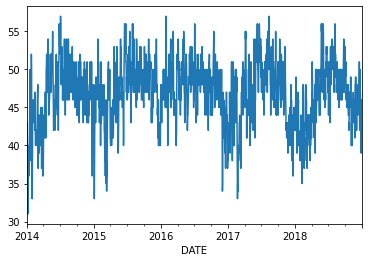

In [3]:
df["AvgTemp"].plot()

In [4]:
df.isna().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [5]:
df=df.dropna()

Check Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df.AvgTemp)
pval=res[1]
if pval>0.05:
  print("Not Stationary")
else:
  print("Stationary")

Stationary


Fit Auto ARIMA 

In [7]:
!pip install pmdarima

In [8]:
from pmdarima import auto_arima

auto_model=auto_arima(df["AvgTemp"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=3.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.75 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=3.92 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=3.83 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=3.61 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=4.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=4.87 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=5.50 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=5.35 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [9]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.480
Date:                Fri, 10 Sep 2021   AIC                           8294.960
Time:                        06:28:46   BIC                           8339.017
Sample:                             0   HQIC                          8311.213
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2633      0.374      3.377      0.001       0.530       1.996
ar.L1          0.9729      0.008    120.958      0.000       0.957       0.989
ma.L1         -0.1266      0.024     -5.344      0.000      -0.173      -0.080
ma.L2         -0.2167      0.024     -8.987      0.000      -0.264      -0.169
ma.L3         -0.2038      0.024     -8.546      0.000      -0.251      -0.157
ma.L4         -0.1400      0.023     -6.164      0.000      -0.184      -0.095
ma.L5         -0.0471      0.024     -1.937      0.053      -0.095       0.001
sigma2         5.4837      0.171     32.032      0.000       5.148       5.819
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.67
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Conclusion :

    Best model:  ARIMA(1,0,5)(0,0,0)[0] intercept
    p=1 , d=0 , q=5
    Total fit time: 60.675 seconds

In [10]:
X=df["AvgTemp"]
len(X)

train_len=int(0.8*len(X))
train=X[:train_len]
print(len(train))

test=X[train_len:]
print(len(test))

1456
365


Fit ARIMA model

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1456
Model:                     ARMA(1, 5)   Log Likelihood               -3334.671
Method:                       css-mle   S.D. of innovations              2.389
Date:                Fri, 10 Sep 2021   AIC                           6685.343
Time:                        06:31:30   BIC                           6727.610
Sample:                             0   HQIC                          6701.113
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.860     54.102      0.000      44.844      48.215
ar.L1.AvgTemp     0.9844      0.009    112.836      0.000       0.967       1.002
ma.L1.AvgTemp    -0.1312      0.028     -4.704      0.000      -0.186      -0.077
ma.L2.AvgTemp    -0.2444      0.028     -8.852      0.000      -0.299      -0.190
ma.L3.AvgTemp    -0.2051      0.029     -7.029      0.000      -0.262      -0.148
ma.L4.AvgTemp    -0.1476      0.027     -5.486      0.000      -0.200      -0.095
ma.L5.AvgTemp    -0.0584      0.028     -2.082      0.037      -0.113      -0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0158           +0.0000j            1.0158            0.0000
MA.1            1.0910           -0.0000j            1.0910           -0.0000
MA.2            0.0718           -1.8558j            1.8572           -0.2438
MA.3            0.0718           +1.8558j            1.8572            0.2438
MA.4           -1.8803           -1.0060j            2.1325           -0.4218
MA.5           -1.8803           +1.0060j            2.1325            0.4218
-----------------------------------------------------------------------------
"""

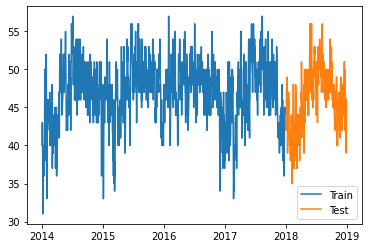

In [12]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [13]:
ypred_train=model_fit.predict()
ypred_train

DATE
2014-01-01    46.529318
2014-01-02    41.196917
2014-01-03    43.977320
2014-01-04    41.710022
2014-01-05    38.275595
                ...    
2017-12-25    44.577266
2017-12-26    41.599461
2017-12-27    43.748000
2017-12-28    44.505478
2017-12-29    42.748242
Length: 1456, dtype: float64

Prediction on test data

    start->len(train) 
    end->len(train)+len(test)-1
    end->len(X)-1

In [14]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [16]:
ypred_test

1456    42.929235
1457    42.907454
1458    43.061218
1459    43.165987
1460    43.203599
          ...    
1816    46.516796
1817    46.516990
1818    46.517182
1819    46.517371
1820    46.517557
Length: 365, dtype: float64

In [17]:
#index of ypred_test should be change
date_test=pd.date_range(start='2017-12-30',end="2018-12-29")
date_test

DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '2018-01-08',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', length=365, freq='D')

In [18]:
ypred_test.index=date_test

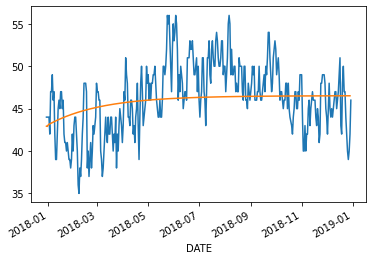

In [19]:
test.plot()
ypred_test.plot()

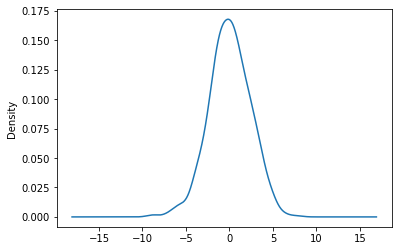

In [20]:
residuals=model_fit.resid
residuals.plot(kind="kde")

In [21]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 14.341748045487046
RMSE is : 3.787050045284198


predict temperature for next month

In [22]:
model=ARIMA(X,order=(1,0,5))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [23]:
forecast=model_fit.predict(start=len(X),end=len(X)+29)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [24]:
forecast[:5]

1821    46.418064
1822    46.113782
1823    45.617771
1824    45.249555
1825    45.116984
dtype: float64

In [25]:
forecast_date=pd.date_range(start="2019-01-01",end="2019-01-30")
len(forecast_date),len(forecast)

(30, 30)

In [26]:
forecast.index=forecast_date

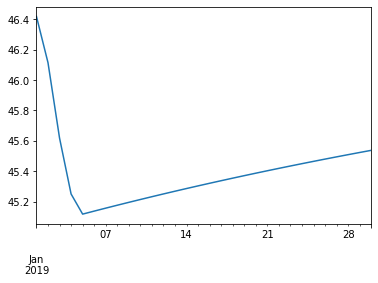

In [27]:
forecast.plot()